In [2]:
# Let's import what we gonna to use firstly.
import nltk
import pandas as pd


from bs4 import BeautifulSoup
import re


# All the imports for the sentimental analysis

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

In [3]:
dataset = pd.read_csv("Combined_dataset.csv", sep=',',low_memory=False)
original_data= pd.read_csv("sample.csv", sep=',',low_memory=False)

In [4]:
dataset.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,N,Y,Five Stars,ok,31/08/15
1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,N,Y,Love it!!!,"Perfect, even sturdier than the original!",31/08/15
2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,N,Y,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",31/08/15
3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,N,Y,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,31/08/15
4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,N,Y,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,31/08/15


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        2099 non-null   object
 1   customer_id        2099 non-null   int64 
 2   review_id          2099 non-null   object
 3   product_id         2099 non-null   object
 4   product_parent     2099 non-null   int64 
 5   product_title      2099 non-null   object
 6   product_category   2099 non-null   object
 7   star_rating        2099 non-null   int64 
 8   helpful_votes      2099 non-null   int64 
 9   total_votes        2099 non-null   int64 
 10  vine               2099 non-null   object
 11  verified_purchase  2099 non-null   object
 12  review_headline    2099 non-null   object
 13  review_body        2099 non-null   object
 14  review_date        2099 non-null   object
dtypes: int64(5), object(10)
memory usage: 246.1+ KB


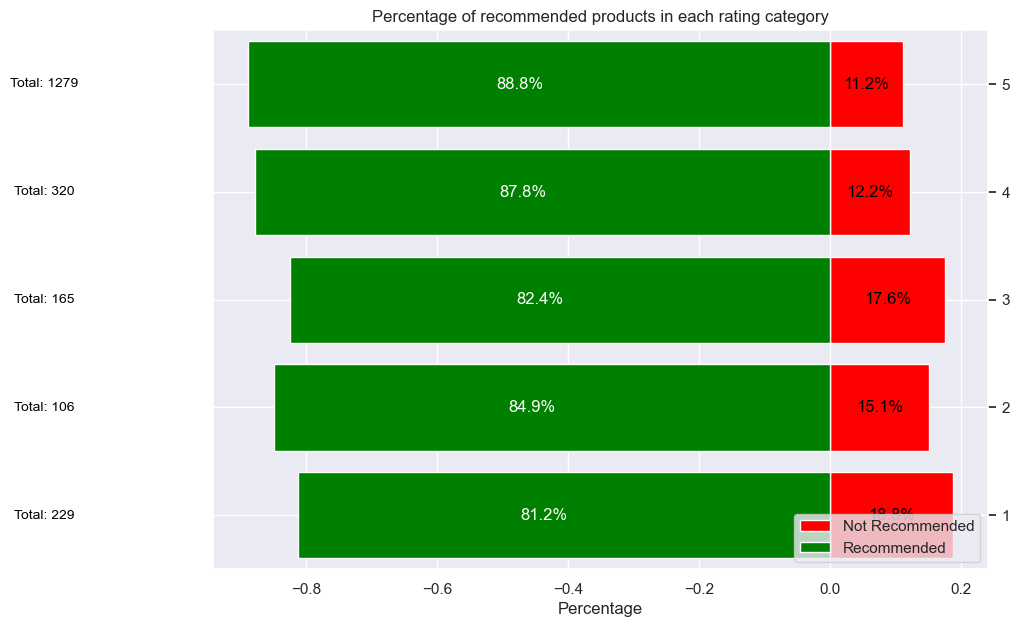

In [6]:
rating_recommended_percentage = dataset.groupby("star_rating")["helpful_votes"].value_counts(normalize=True).unstack().fillna(0)
rating_recommended_percentage['Recommended'] = 1 - rating_recommended_percentage[1]
rating_counts = dataset['star_rating'].value_counts()

rating_counts = rating_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (rating, count) in enumerate(rating_counts.items()):
    ax.text(-1.2, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)
ax.barh(rating_recommended_percentage.index.astype(str), rating_recommended_percentage[1], color='red', label='Not Recommended')

# Not Recommended
ax.barh(rating_recommended_percentage.index.astype(str), -rating_recommended_percentage['Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(rating_recommended_percentage)))
ax.set_yticklabels(rating_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

ax.set_ylim([-0.5, len(rating_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each rating category")
plt.xlabel("Percentage")
plt.show()

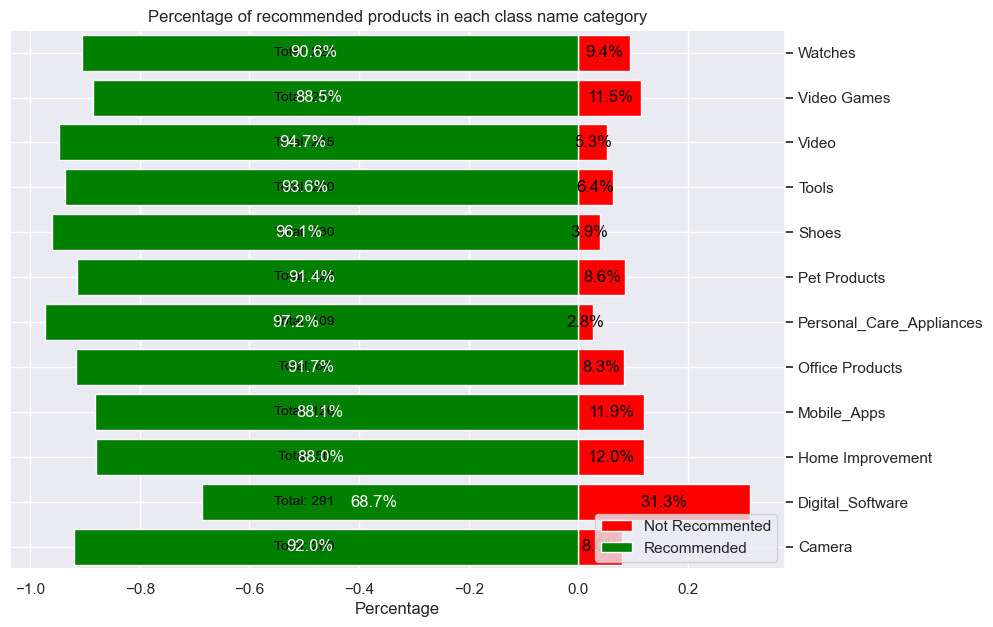

In [7]:
class_name_recommended_percentage = dataset.groupby("product_category")["star_rating"].value_counts(normalize=True).unstack().fillna(0)
class_name_recommended_percentage['Not Recommended'] = 1 - class_name_recommended_percentage[1]
class_name_counts = dataset['product_category'].value_counts()

class_name_counts = class_name_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (class_name, count) in enumerate(class_name_counts.items()):
    ax.text(-0.5, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)

# Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), class_name_recommended_percentage[1], color='red', label='Not Recommented')

# Not Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), -class_name_recommended_percentage['Not Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(class_name_recommended_percentage)))
ax.set_yticklabels(class_name_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

# Set ylim for better alignment
ax.set_ylim([-0.5, len(class_name_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each class name category")
plt.xlabel("Percentage")
plt.show()

/var/folders/4q/ld56_1kn62z9px05kfw3hnhw0000gn/T/ipykernel_1742/3443602626.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset["star_rating"])


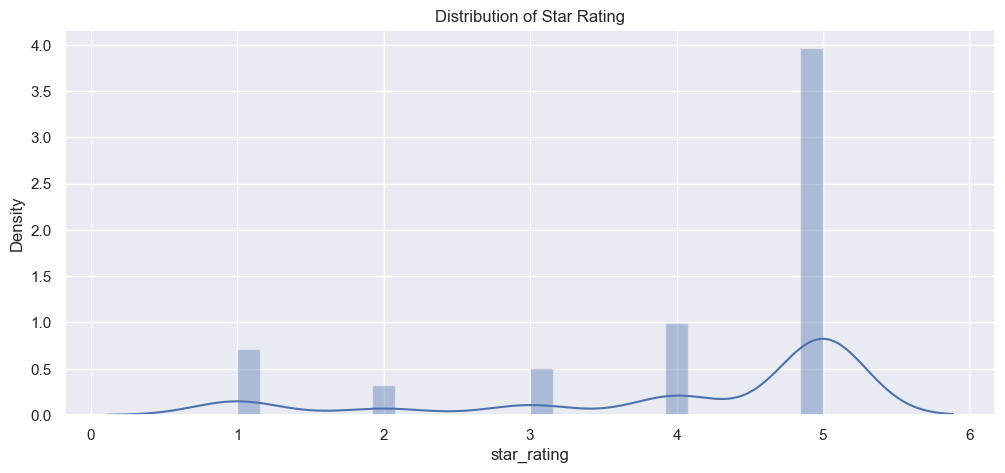

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.title("Distribution of Star Rating")
ax = sns.distplot(dataset["star_rating"])

In [9]:
data=pd.DataFrame(dataset)
col=["review_body","star_rating"]
data=data.loc[:,col]


In [10]:
data.head()


,review_body,star_rating
0,ok,5
1,"Perfect, even sturdier than the original!",5
2,"If the words, &#34;Cheap Chinese Junk&#34; com...",2
3,Exactly what I wanted and expected. Perfect fo...,5
4,I will look past the fact that they tricked me...,5


In [11]:
data['star_rating'].value_counts().sort_index(ascending=False)

star_rating
5    1279
4     320
3     165
2     106
1     229
Name: count, dtype: int64

In [12]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['star_rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,review_body,star_rating,sentiment_score,sentiment
0,ok,5,1,POSITIVE
1,"Perfect, even sturdier than the original!",5,1,POSITIVE
2,"If the words, &#34;Cheap Chinese Junk&#34; com...",2,0,NEGATIVE
3,Exactly what I wanted and expected. Perfect fo...,5,1,POSITIVE
4,I will look past the fact that they tricked me...,5,1,POSITIVE


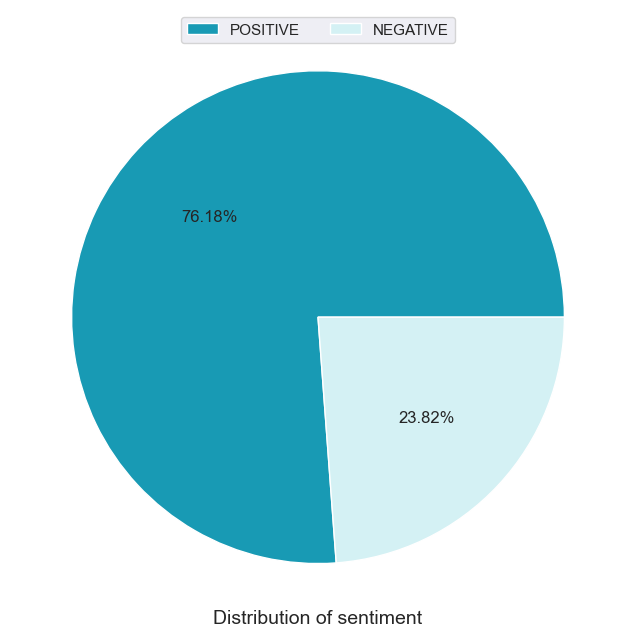

In [13]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [14]:
all_words = pd.Series(' '.join(data['review_body']).split())


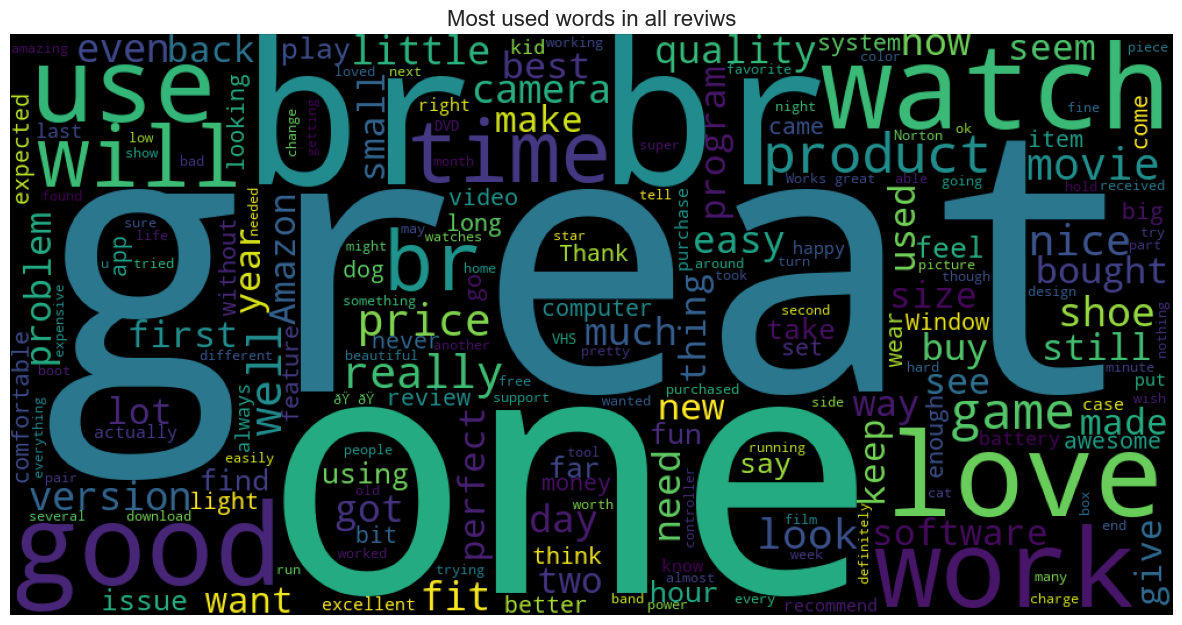

In [15]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

In [16]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['review_body']).split())

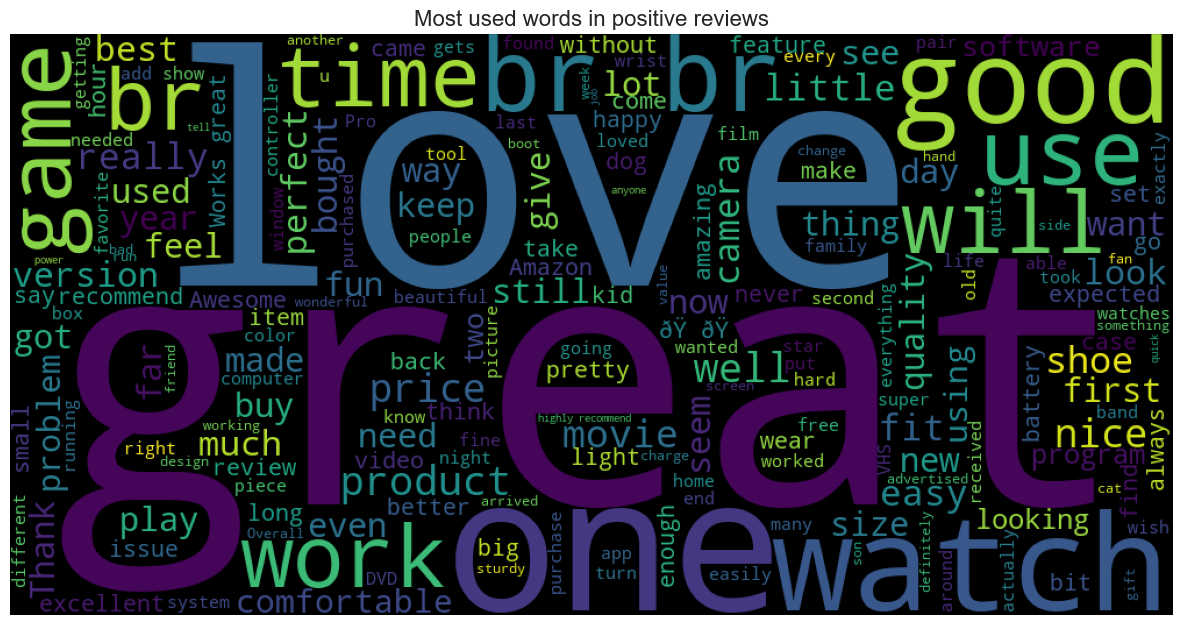

In [17]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

In [18]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['review_body']).split())

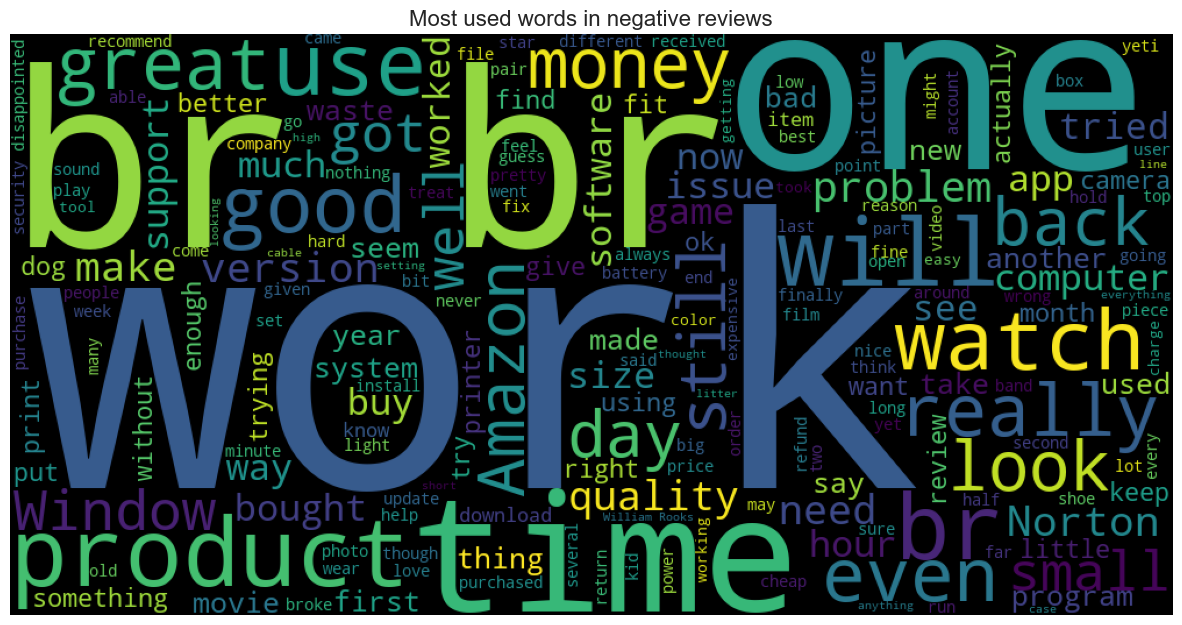

In [19]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [20]:
df = pd.read_csv("sample.csv", sep=',',low_memory=False)

In [21]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,49033728,R1P1G5KZ05H6RD,6302503213,748506413.0,The Night They Saved Christmas [VHS],Video,5.0,0.0,0.0,N,Y,Very satisfied!!,Fast shipping. Pleasure to deal with. Would re...,2015-08-31
1,US,17857748,R106N066IUN8ZV,B000059PET,478710180.0,"Hamlet / Kline, New York Shakespeare Festival ...",Video,5.0,0.0,0.0,N,Y,The most talented actor ever!,"Kevin Kline is the most versatile, multi-talen...",2015-08-31
2,US,25551507,R7WTAA1S5O7D9,788812807,981002815.0,Nascar Dual Powered Calculator (Solar & Batter...,Video,4.0,0.0,0.0,N,Y,Four Stars,great movie,2015-08-31
3,US,21025041,R32HFMVWLYOYJK,6302509939,333219811.0,"The Man From U.N.C.L.E, Volume 19: The Brain K...",Video,5.0,0.0,0.0,N,Y,Five Stars,i love the martin landau episode,2015-08-31
4,US,40943563,RWT3H6HBVAL6G,B00JENS2BI,538101194.0,Playboy Video Party Jokes [VHS],Video,3.0,0.0,0.0,N,N,"HOT women, dumb jokes",Y'know what this reminded me of? Those sketch ...,2015-08-31


In [22]:
df.head()
convert_dict = {'product_title': str,
                'review_body': str
                }
df = df.astype(convert_dict)
print(df.dtypes)

marketplace           object
customer_id           object
review_id             object
product_id            object
product_parent       float64
product_title         object
product_category      object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object


In [23]:
df.drop(['marketplace','customer_id','review_id','product_id','product_parent','helpful_votes','total_votes','vine','review_date'], axis=1, inplace=True)

In [24]:
df['star_rating'].value_counts()

star_rating
5.0    203986
4.0     67827
3.0     32468
1.0     25659
2.0     18022
Name: count, dtype: int64

In [25]:

def mapping(x):
    if x > 4: return 1
    if x <= 4: return 0

df['label']= df['star_rating'].apply(mapping)

df = df[['review_body', 'label','star_rating']]

In [26]:
from collections.abc import Mapping
for ele in df['star_rating'].values:
    mapping(ele)

In [27]:
df.head()

,review_body,label,star_rating
0,Fast shipping. Pleasure to deal with. Would re...,1.0,5.0
1,"Kevin Kline is the most versatile, multi-talen...",1.0,5.0
2,great movie,0.0,4.0
3,i love the martin landau episode,1.0,5.0
4,Y'know what this reminded me of? Those sketch ...,0.0,3.0


In [28]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
df['tokenized_sentences_nltk'] = df['review_body'].apply(nltk.word_tokenize)
df['tokenized_sentences_naive'] = df['review_body'].apply(lambda s: s.split(' '))

from nltk.tokenize import word_tokenize as WordTokenizer
def custom_tokenize(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)
# dataset['review_body'] = dataset.column.apply(custom_tokenize)
# We can tokenize a sentence using a tokenizer or splitting by space simply.
df['tokenized_sentences_nltk'] = df['review_body'].apply(nltk.word_tokenize) # it take some times
df['tokenized_sentences_naive'] = df['review_body'].apply(lambda s: s.split(' '))

[nltk_data] Downloading package stopwords to /Users/arun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/arun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/arun/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [29]:
stopwords = set(nltk.corpus.stopwords.words())
print(stopwords)

{'horiek', 'שלי', 'fue', 'taka', 'hubiese', 'سبعمائة', '无法', 'd', 'nélkül', 'إياها', 'šestnajsti', 'setengah', 'tenha', 'desetero', 'করেছিলেন', 'štirideset', 'enkratnim', "δ'", 'ahhoz', 'petem', 'aviez', 'petindvajsetih', 'trikratnega', 'joksi', 'inho', '万一', 'বিভিন্ন', "i'd", 'التي', 'sva', 'ăsta', 'जान', '首先', 'tinc', 'भएको', 'dovolili', 'done', 'কেউ', 'honebestez', 'juga', 'dekhi', 'rasa', 'enaindvajsetim', 'then', 'ذِه', 'devetdeseti', 'ҳатто ', '那样', 'dvestotih', 'بَلْهَ', 'stette', 'fata', 'sploh', 'এল', 'तेस्रो', 'ба тразе ки ', 'abbiano', 'našem', '关于', 'нас', 'ataukah', 'petstotih', 'inilah', 'যান', 'dvainšestdesetim', 'enakih', 'sentida', 'eines', 'του', '上面', 'benne', 'ayants', 'tuviéramos', '大家', 'thinking', 'thank', 'шояд ки', 'thereby', 'onima', 'bana', 'yli', 'কত', 'hočete', 'οὖν', 'hai', 'করতে', 'eğer', 'vsakim', 'seré', 'hayas', 'vsaka', 'bist', 'sea', 'osemnajstima', 'sera', 'hvem', 'osmi', 'طَق', 'ঠিক', 'segalanya', 'хайр', 'dude', 'куда', 'fueseis', 'bəzi', 'जताततै'

In [30]:
def clean_stopwords(sentence):
    res = []
    for word in sentence:
        if word not in stopwords:
            res.append(word)
    return res
    # return [w if w not in stopwords for w in sentence]

df['tokenized_sentences_nltk_remove_stopwords'] = df['tokenized_sentences_nltk'].apply(clean_stopwords)

In [31]:
pd.set_option('display.max_colwidth', 300)

In [32]:
df[['review_body', 'tokenized_sentences_nltk', 'tokenized_sentences_naive', 'tokenized_sentences_nltk_remove_stopwords','star_rating']].head()

,review_body,tokenized_sentences_nltk,tokenized_sentences_naive,tokenized_sentences_nltk_remove_stopwords,star_rating
0,Fast shipping. Pleasure to deal with. Would recommend. A+++. Thanks!,"[Fast, shipping, ., Pleasure, to, deal, with, ., Would, recommend, ., A+++, ., Thanks, !]","[Fast, shipping., Pleasure, to, deal, with., Would, recommend., A+++., Thanks!]","[Fast, shipping, ., Pleasure, deal, ., Would, recommend, ., A+++, ., Thanks, !]",5.0
1,"Kevin Kline is the most versatile, multi-talented actor ever. No matter what he does, it's done perfectly. Wish he'd get more parts while we still have him with us. I just love this man!","[Kevin, Kline, is, the, most, versatile, ,, multi-talented, actor, ever, ., No, matter, what, he, does, ,, it, 's, done, perfectly, ., Wish, he, 'd, get, more, parts, while, we, still, have, him, with, us, ., I, just, love, this, man, !]","[Kevin, Kline, is, the, most, versatile,, multi-talented, actor, ever., , No, matter, what, he, does,, it's, done, perfectly., , Wish, he'd, get, more, parts, while, we, still, have, him, with, us., , I, just, love, this, man!]","[Kevin, Kline, versatile, ,, multi-talented, actor, ., No, matter, ,, 's, perfectly, ., Wish, 'd, parts, ., I, love, !]",5.0
2,great movie,"[great, movie]","[great, movie]","[great, movie]",4.0
3,i love the martin landau episode,"[i, love, the, martin, landau, episode]","[i, love, the, martin, landau, episode]","[love, martin, landau, episode]",5.0
4,"Y'know what this reminded me of? Those sketch comedy-style features from the '70s like &#34;The Groove Tube&#34; and &#34;Can I Do It Till I Need Glasses?&#34;, with the only real difference being that this video is, well, shot on video and features what are, arguably, a hotter caliber of sexy w...","[Y'know, what, this, reminded, me, of, ?, Those, sketch, comedy-style, features, from, the, '70s, like, &, #, 34, ;, The, Groove, Tube, &, #, 34, ;, and, &, #, 34, ;, Can, I, Do, It, Till, I, Need, Glasses, ?, &, #, 34, ;, ,, with, the, only, real, difference, being, that, this, video, is, ,, we...","[Y'know, what, this, reminded, me, of?, Those, sketch, comedy-style, features, from, the, '70s, like, &#34;The, Groove, Tube&#34;, and, &#34;Can, I, Do, It, Till, I, Need, Glasses?&#34;,, with, the, only, real, difference, being, that, this, video, is,, well,, shot, on, video, and, features, wha...","[Y'know, reminded, ?, Those, sketch, comedy-style, features, '70s, &, #, 34, ;, The, Groove, Tube, &, #, 34, ;, &, #, 34, ;, Can, I, Do, It, Till, I, Need, Glasses, ?, &, #, 34, ;, ,, real, difference, video, ,, ,, shot, video, features, ,, arguably, ,, hotter, caliber, sexy, women, ,, including...",3.0


In [33]:
cleaned_texts = df['tokenized_sentences_nltk_remove_stopwords'].values
labels = df['label'].values

In [34]:
word_frequency = {} 
word_energy = {}


for text, label in zip(cleaned_texts, labels):
    for word in text:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
            
        if label == 1:
            if word not in word_energy:
                word_energy[word] = 1
            else:
                word_energy[word] += 1
        else:
            if word not in word_energy:
                word_energy[word] = -1
            else:
                word_energy[word] -= 1

In [35]:
for word in word_energy:
    word_energy[word] /= word_frequency[word]

In [36]:
reliable_word_energy = {}
for word in word_energy:
    # we assume that the energies would be reliable only for words that appear more than 500 times in our corpus. 
    if word_frequency[word] > 500: 
        reliable_word_energy[word] = word_energy[word]

In [37]:
top_30_positive_words = [v[0] for v in sorted(reliable_word_energy.items(), key=lambda x: x[1], reverse=True)[:300]]
top_30_negative_words = [v[0] for v in sorted(reliable_word_energy.items(), key=lambda x: x[1], reverse=False)[:300]]

In [38]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

def plot_word_clouds(keywords):
    wordcloud = WordCloud().generate(' '.join(keywords))
    plt.figure(figsize=(1, 1))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [39]:
print(top_30_positive_words)

['Hoppy', 'Cisco', 'transfere', 'Died', 'FEATURES', 'B-Western', 'VCI', 'Monogram', 'HIGHLY', 'grandchildren', 'Entertainment', 'MUST', 'BEST', 'Brilliant', 'LOVED', 'WONDERFUL', 'EXCELLENT', 'timeless', "'40s", 'tire', 'Hatton', 'Vol', 'AWESOME', 'Highly', 'SPECIAL', 'all-time', 'cried', 'LOVE', 'WOW', 'NOW', 'unforgettable', 'awsome', 'heartwarming', "'30s", 'Excellent', 'Mack', 'Schindler', 'Bravo', 'finest', 'everytime', 'crisp', 'Marshal', 'Clyde', 'Steele', 'must-have', 'flawless', 'Cassidy', 'enchanting', 'GREAT', 'captivated', 'FUN', 'Thanks', 'Thank', 're-released', 'tuned', 'masterfully', "'em", 'ages', 'EVERY', 'penny', 'perfection', 'BIOS', 'Truly', 'CA', 'hooked', 'favorites', 'SEE', 'searched', 'cry', 're-release', 'Wonderful', 'incredible', 'BUY', 'tears', 'healing', 'must-see', 'superb', 'christmas', 'wonderful', 'Buy', 'awesome', 'brilliantly', 'heartbreaking', 'fabulous', 'astounding', 'WILL', 'amazing', 'PLEASE', 'Boyd', 'favorite', 'Crabbe', 'EVER', 'funniest', 'Bir

In [40]:
print(top_30_negative_words)

['nan', 'waste', 'redeeming', 'forgettable', 'disappointing', 'poorly', 'uneven', 'Save', 'mediocre', 'laughable', 'bland', 'lacks', 'lousy', 'Def', 'misleading', 'worst', 'lame', 'wasted', 'awful', 'miscast', 'pointless', 'mildly', 'tedious', 'Flair', 'disappointment', 'decent', 'contrived', 'turkey', 'dreadful', 'watchable', 'ludicrous', 'drags', 'lacked', 'Otherwise', 'predictable', 'low-budget', 'irritating', 'zero', 'Bulldog', 'insult', 'ridiculous', 'Champions', 'whatsoever', 'NWA', 'terrible', 'B-movie', 'alright', 'horrible', 'holes', 'WCW', 'adequate', 'annoying', 'trite', 'Michaels', 'worse', 'mess', 'weak', 'wooden', 'boring', 'distracting', 'pathetic', 'bothered', 'repetitive', 'stupid', 'rushed', 'pretentious', 'unnecessary', 'dull', 'frustrating', 'Luger', 'unrealistic', 'confusing', 'flat', 'Ric', 'cheap', 'lacking', 'Playmate', 'cliches', 'Unless', 'dumb', 'Mankind', 'premise', 'subplot', 'badly', 'excuse', 'competent', 'fairly', 'poor', 'disgusting', 'desired', 'hokey'